# Stock Price Prediction Using Machine Learning
This is an interactive notebook. You have to complete empty code blocks before you can run subsequet cells. Run the cell below first to load all necessary libraries. You need to write code in places with ???

In [1]:
%matplotlib inline

# for file management
import os

# this library is for loading data and manipulating it
import pandas as pd

# import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import keras
import tensorflow as tf

# get a helper function for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

# get a function for measuring test error
from sklearn.metrics import mean_absolute_error

# get a standard scaler for normalisation 
from sklearn.preprocessing import StandardScaler

# for manipulating arrays
import numpy as np

# for visualising data
import matplotlib.pyplot as plt

## 1 Simple Price Prediction

### 1.1 Preparing the Dataset

The first step is to load and display the data as a table.

In [2]:
# === your code goes here === #
# load the data
data = pd.read_csv("2800data2.csv")

# get a quick overview of the data
print(data.info())
print(data.describe())

# display the data
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           1487 non-null   int64  
 1   Date            1487 non-null   float64
 2   Open            1487 non-null   float64
 3   High            1487 non-null   float64
 4   Low             1487 non-null   float64
 5   Close           1487 non-null   float64
 6   Volume          1487 non-null   int64  
 7   Day _n-1 Price  1487 non-null   float64
 8   Day _n-2 Price  1487 non-null   float64
 9   Day _n-3 Price  1487 non-null   float64
 10  Day _n-4 Price  1487 non-null   float64
 11  Day _n-5 Price  1487 non-null   float64
 12  Next Price      1487 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 151.1 KB
None
             Index          Date         Open         High          Low  \
count  1487.000000   1487.000000  1487.000000  1487.000000  1487.000000   
mean    75

,Index,Date,Open,High,Low,Close,Volume,Day _n-1 Price,Day _n-2 Price,Day _n-3 Price,Day _n-4 Price,Day _n-5 Price,Next Price
0,11,41520.66667,22.90,23.15,22.90,23.00,33910604,22.85,22.30,22.30,22.15,22.50,22.95
1,12,41521.66667,22.85,23.10,22.80,22.95,15896714,23.00,22.85,22.30,22.30,22.15,23.25
2,13,41522.66667,23.20,23.40,23.20,23.25,51204016,22.95,23.00,22.85,22.30,22.30,23.30
3,14,41523.66667,23.25,23.40,23.25,23.30,42129400,23.25,22.95,23.00,22.85,22.30,23.40
4,15,41526.66667,23.50,23.60,23.35,23.40,26144464,23.30,23.25,22.95,23.00,22.85,23.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,1493,43720.66667,28.20,28.20,27.85,27.95,61080860,27.95,27.55,27.55,27.45,27.40,28.20
1483,1494,43721.66667,28.05,28.30,27.95,28.20,66372571,27.95,27.95,27.55,27.55,27.45,27.95
1484,1495,43724.66667,28.10,28.10,27.85,27.95,71374309,28.20,27.95,27.95,27.55,27.55,27.65
1485,1496,43725.66667,27.90,27.90,27.55,27.65,49162208,27.95,28.20,27.95,27.95,27.55,27.65


It's important to preprocess your dataset to make sure null values are handled properly. In this tutorial, we will simply get rid of any rows that have empty values.

In [3]:
# get rid of rows with empty values
data = data.dropna()

# check the shape to see how many rows have been dropped
data.shape

(1487, 13)

The next step is to split the data into inputs and outputs. The output in this case is the next price, so we need to delete the column from the inputs. We also don't need the date and index as input features, so we need to drop them as well. As for the other features, i.e. Open, High, Low and Volume, let's drop them and only use closing prices from the last 5 days.

In [7]:
# drop unnecessary columns (only leave closing prices from the previous 5 days and those from the 'Close' column)
# store the result in a variable called X 
X = data[['Close']+list(filter(lambda x:'Day' in x, data.columns))]

# display X
X

,Close,Day _n-1 Price,Day _n-2 Price,Day _n-3 Price,Day _n-4 Price,Day _n-5 Price
0,23.00,22.85,22.30,22.30,22.15,22.50
1,22.95,23.00,22.85,22.30,22.30,22.15
2,23.25,22.95,23.00,22.85,22.30,22.30
3,23.30,23.25,22.95,23.00,22.85,22.30
4,23.40,23.30,23.25,22.95,23.00,22.85
...,...,...,...,...,...,...
1482,27.95,27.95,27.55,27.55,27.45,27.40
1483,28.20,27.95,27.95,27.55,27.55,27.45
1484,27.95,28.20,27.95,27.95,27.55,27.55
1485,27.65,27.95,28.20,27.95,27.95,27.55


In [8]:
# prepare outputs by storing values from the 'Next Price' column in a variable called y (preserve the case)
y = data['Next Price'].to_frame()

# display y
y

,Next Price
0,22.95
1,23.25
2,23.30
3,23.40
4,23.60
...,...
1482,28.20
1483,27.95
1484,27.65
1485,27.65


Next, we will need to split the dataset into 2 parts: a training set and a test set, where the former should be much larger than the latter. A common train-to-test ratio for small datasets is 80:20, but in this example we will use a 50:50 split due to the nature of the data to illustrate that percentage-change-based prediction shows better performance. model_data is a dictionary (a built-in Python data structure) for storing errors of different models for us to compare them at the end. A dictionary stores key-value pairs, where keys must be unique. In this case, keys are model names, e.g. "Random Forest", and values are also dictionaries containing data about each model, namely, test error and predictions. model_data will be used at the end of section 1 to plot all models' predictions on the same graph. 

In [24]:
# split the data into a training and test sets (50% training, 50% testing)
# remember to set shuffle to False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, shuffle = False)

# prepare a dictionary for storing test errors and predictions
model_data = dict()

In [25]:
# normalise the data to speed up training (only fit on the training set!)
X_scaler, y_scaler = StandardScaler(), StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_test.values

# see what the normalised data looks like
print(X_train[:5])
print(y_train[:5])
print(y_test[:5])

# check dataset shapes
print("Training inputs shape:", X_train.shape)
print("Training outputs shape:", y_train.shape)
print("Testing inputs shape:", X_test.shape)
print("Testing outputs shape:", y_test.shape)

[[-0.21968531 -0.29295626 -0.56419857 -0.56273926 -0.6355772  -0.46109687]
 [-0.24447289 -0.21858274 -0.29150815 -0.56273926 -0.56122137 -0.63457523]
 [-0.09574743 -0.24337391 -0.21713804 -0.29006078 -0.56122137 -0.56022736]
 [-0.07095986 -0.09462687 -0.24192808 -0.21569392 -0.28858334 -0.56022736]
 [-0.02138471 -0.0698357  -0.09318785 -0.24048287 -0.21422751 -0.28761851]]
[[-0.24563503]
 [-0.0969533 ]
 [-0.07217301]
 [-0.02261243]
 [ 0.07650873]]
[[24.05]
 [24.  ]
 [23.95]
 [24.1 ]
 [24.25]]
Training inputs shape: (743, 6)
Training outputs shape: (743, 1)
Testing inputs shape: (744, 6)
Testing outputs shape: (744, 1)


In [12]:
# prepare a helper function for plotting prices to avoid code redundancy
def plot_prices(y_pred, y_test, model_name, title="Closing Price Predictions"):
    plt.figure(figsize=(9,6))
    plt.title(title + f" ({model_name})")
    plt.plot(y_pred, label=model_name)
    plt.plot(y_test, label="Actual")
    plt.ylabel('Price')
    plt.xlabel('Day')
    plt.legend()
    plt.show()

Now we are ready to start training models and generating predictions based on the preprocessed data.

### 1.2 Random Forest

Error of Random Forest regression model: 0.8005483870967661


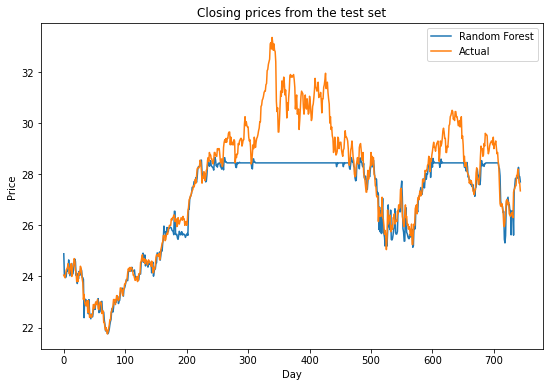

In [8]:
# initialise a random forest regression model
model = ???

# train the model 
???

# use the model to make predictions on the test set
normalised_y_pred = ???

# scale the outputs back
y_pred = y_scaler.???(normalised_y_pred.reshape(-1, 1))

# calculate MAE and store predictions for comparing all models' predictions on one graph
model_name = "Random Forest"
model_data[model_name] = {
    "error": ???, 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plot_prices(y_pred, y_test, model_name)

### 1.3 kNN

Error of kNN regression model: 0.9286827956989242


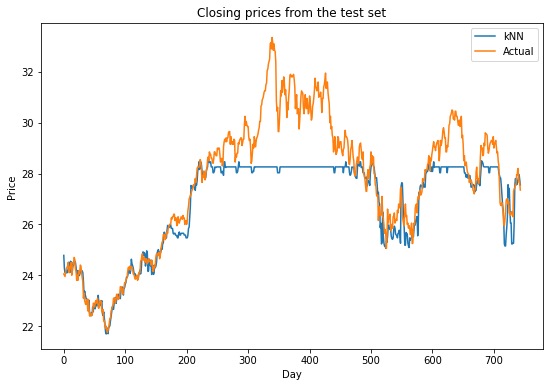

In [9]:
# now let's try kNN regression
# initialise a model
model = ???

# train the model
???

# get predictions
normalised_y_pred = ???

# scale the outputs back
y_pred = y_scaler.???(normalised_y_pred.reshape(-1, 1))

# calculate MAE
model_name = "kNN"
model_data[model_name] = {
    "error": ???, 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plot_prices(y_pred, y_test, model_name)

### 1.4 SVM

Error of SVM regression model: 1.539928342077407


D:\Programs\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


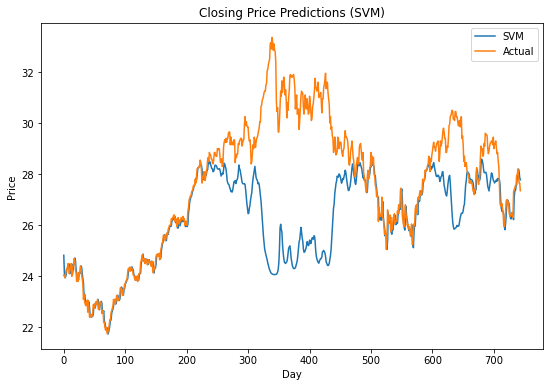

In [27]:
# now let's try SVM
model = SVR()

# train the model
model.fit(X_train, y_train)

# get predictions
normalised_y_pred = model.predict(X_test)

# scale the outputs back
y_pred = y_scaler.inverse_transform(normalised_y_pred.reshape(-1, 1))

# calculate error
model_name = "SVM"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, y_test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plot_prices(y_pred, y_test, model_name)

### 1.5 Neural Network

Error of MLP regression model: 0.4236802395707619


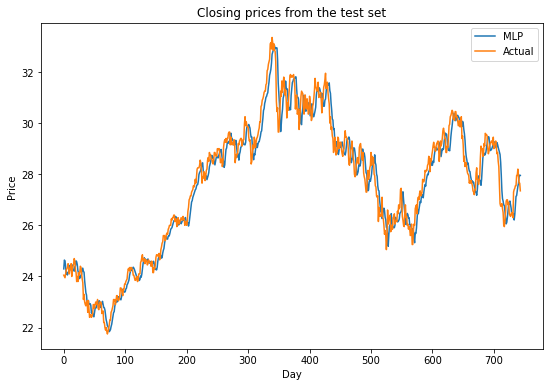

In [11]:
# now let's try a neural network (multi-layer perceptron)
model = ???

# train the model
???

# get predictions
normalised_y_pred = ???

# scale the outputs back
y_pred = y_scaler.???(normalised_y_pred.reshape(-1, 1))

# calculate error
model_name = "MLP"
model_data[model_name] = {
    "error": ???, 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plot_prices(y_pred, y_test, model_name)

### 1.6 LSTM

Stock data is a time series, meaning that the order in which it comes matters and carries important information, unlike, say, a sequence of images of flowers used for training a flower classifier. Individual stock prices are not likely to be useful, but sequences of prices can give insight into future trends. LSTM (Long-Short Term Memory) models are a great choice for this problem. LSTM models’ structure allow them to “have a memory” of previous values, making them useful for sequential data. We will use keras to build a custom LSTM model. You can use the hidden_layers list to specify how many layers to include in the model and how many units should be in each layer. The length of the list specifies the number of layers, and each value is the number of units in each layer. We also add dropout after each layer for regularization to prevent overfitting, which is common on small datasets. Fortunately, LSTMs accept 3D data, which means that we can pass in several features for each data point in a sequence. Each row in the input matrix represents a single training sample, the length of each sample is the window size, and in each value in the window we can have several features: Open, Close, High, Low and more. We will split the training dataset into sliding windows of prices, which will predict the next price. 

In [ ]:
# define helper functions for LSTM training

# this function splits the data into sequences using the sliding window approach
def split_into_windows(data, window_size, output_col, input_cols):
    X, y = [], []
    for i in range(0, data.shape[0] - window_size):
        X.append(data.loc[i:i + window_size - 1, input_cols])
        y.append([data.loc[i + window_size - 1, output_col]])
    return np.array(X), np.array(y)

# this function constructs a Keras LSTM model and returns it
def build_lstm_model(window_size, num_features, num_units):
    if len(num_units) == 0:
        raise Exception("Number of units cannot be empty")
    model = keras.models.Sequential()
    
    # at least 1 layer is required
    model.add(keras.layers.LSTM(units=num_units[0], input_shape=(window_size, num_features), activation="relu", return_sequences=(True if len(num_units) > 1 else False)))
    
    # add the specified number of LSTM layers
    for i in range(1, len(num_units)):
        model.add(keras.layers.LSTM(units=num_units[i], activation="relu", return_sequences=(True if i != len(num_units) - 1 else False)))
        
        # add dropout for regularisation
        model.add(keras.layers.Dropout(0.2))
    
    # this is a fully-connected layer, where every node from the previous layer is connected to every node in the next layer
    model.add(keras.layers.Dense(units=1)) # 1 output value
    
    # compile the model; since this is a regression model, we will use mean_squared_error as our loss function
    model.compile(loss=???, optimizer="adam", metrics=["mae", tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError()])
    
    return model

Model training can take a while depending on the hyperparameters you pick, which are batch size, number of epochs, type of optimizer and more. You can try tweaking them and see how they affect the performance. Make sure that the batch size is smaller than the number of training samples and is an exponent of 2, e.g. 16, 32, 64. After model training is complete, you should be able to see the model’s learning curve.

In [ ]:
# set model parameters
output_col = "Next Price"
features = ["Close"] # + list(filter(lambda x: "Day" in x, data.columns))
window_size = 7 # play around with window size to see its effect on model performance
train_ratio = .5
training_set_size = int(train_ratio * data.shape[0])
# try adjusting the number of layers and hidden units in each layer; 
# len(hidden_layers) = number of layers; hidden_layers[i] = number of hidden units in layer i
# we shall try 50 units in 2 hidden layers followed by a dense layer
hidden_layers = [50, 50] 
epochs = 10
batch_size = 64 # preferably an exponent of 2, e.g. 16, 32, 64, 128 

In [ ]:
# prepare the training dataset
dataset_cols = list(set(features + [output_col]))
training_dataset = data[:training_set_size][training_dataset_cols]

# data should be scaled to speed up training (scaling should be done only on the training set)
scaler = StandardScaler()
training_dataset = pd.DataFrame(scaler.fit_transform(training_dataset), columns=dataset_cols)

# rearrange input data into windows 
X_train, y_train = split_into_windows(training_dataset, window_size, output_col, features)

# print training set shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

To give you a better understanding of how training data is split into windows, here is an example. Suppose the list of stock prices is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]; then the training dataset will be constructed as shown below.
![example](sliding_window_example.png)

In [ ]:
# prepare the test set
testing_dataset = data[training_set_size - window_size:][list(set(features + [output_col]))].reset_index(drop=True)

# normalise
scaled_testing_dataset = pd.DataFrame(scaler.transform(testing_dataset), columns=dataset_cols)

# split into windows
X_test, y_test = split_into_windows(scaled_testing_dataset, window_size, output_col, features)

# print test set shapes
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# load the model
model_name = f"{output_col}_" + "_".join([str(i) for i in hidden_layers]) + f"_{window_size}_{epochs}"

if os.path.isdir(model_name):
    # if the model is already in local disk, just load it
    model = keras.models.load_model(model_name)
else:
    # construct the model
    model = build_lstm_model(window_size, len(features), hidden_layers)
    
    # start training
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), shuffle=False, batch_size=batch_size)
    
    # save the model so that we do not have to train it every time
    model.save(model_name)
    
    # plot the learning rate
    pd.DataFrame(history.history["loss"], columns=["Loss"]).plot()
    
model.summary()

In [ ]:
# get y_test from the testing dataset (y_test shouldn't be normalised)
y_test = testing_dataset[[output_col]][window_size:].values

# run the model
predictions = pd.DataFrame(model.predict(X_test), columns=[output_col])

# scale predictions back to unnormalised form
for c in features:
    if c != output_col:
        predictions[c] = 0
        
#predictions = predictions[features]
#print(predictions.head())
y_pred = pd.DataFrame(scaler.inverse_transform(predictions), columns=dataset_cols)[output_col].values.reshape(-1,1)

assert y_test.shape == y_pred.shape

model_name = "LSTM"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, y_test),
    "predictions": y_pred
}

# calculate total error
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

plot_prices(y_pred, y_test, model_name)

### 1.7 Evaluating All Models

In [ ]:
# now let's plot all models' predictions on one graph 
plt.figure(figsize=(15,6))
plt.title("Closing prices from the test set vs predicted prices")
plt.ylabel('Price')
plt.xlabel('Day')
plt.plot(y_test, label="Actual")

for m in model_data:
    plt.plot(model_data[m]["predictions"], label=m)

plt.legend()
plt.show()   

As you can see, most models could not predict values higher than what they saw in the training set, except for LSTM because it is a more powerful model with lower bias. That is why it is important to have a large dataset for training. Now, let's plot test errors of each model on a scatter plot. 

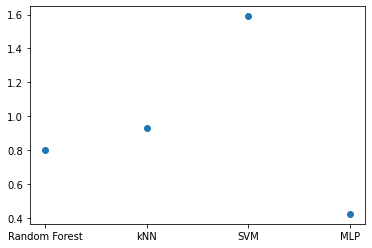

In [13]:
# let's plot the errors of different models using a scatter plot
model_names = [m for m in model_data]
model_errors = [model_data[m]["error"] for m in model_names]
plt.scatter(model_names, model_errors)
plt.show() # it looks like MLP showed the best performance

## 2 Price-Change-%-Based Prediction

### 2.1 Preparing the dataset

In this section, we will use a different dataset and predict stock price percentage changes based on percentage changes compared to the previous 5 days. We can use the dropna() method directly on the dataframe returned by read_csv() to drop rows with missing data.

In [2]:
# load the data and get rid of rows with empty cells
data = ???

# display the data
???

,Index,Date,Open,High,Low,Close,Volume,Day _n-1 Price Change %,Day _n-2 Price Change %,Day _n-3 Price Change %,Day _n-4 Price Change %,Day _n-5 Price Change %,Next Price,Next Price Change %
0,11,41520.66667,22.90,23.15,22.90,23.00,33910604,-0.65,-3.04,-3.04,-3.70,-2.17,22.95,-0.22
1,12,41521.66667,22.85,23.10,22.80,22.95,15896714,0.22,-0.44,-2.83,-2.83,-3.49,23.25,1.31
2,13,41522.66667,23.20,23.40,23.20,23.25,51204016,-1.29,-1.08,-1.72,-4.09,-4.09,23.30,0.22
3,14,41523.66667,23.25,23.40,23.25,23.30,42129400,-0.21,-1.50,-1.29,-1.93,-4.29,23.40,0.43
4,15,41526.66667,23.50,23.60,23.35,23.40,26144464,-0.43,-0.64,-1.92,-1.71,-2.35,23.60,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1396,43579.66667,30.30,30.40,30.00,30.10,21245563,0.50,0.50,1.16,1.16,0.00,29.90,-0.66
1386,1397,43580.66667,30.00,30.20,29.80,29.90,29247126,0.67,1.17,1.17,1.84,1.84,29.90,0.00
1387,1398,43581.66667,29.75,30.00,29.75,29.90,12249407,0.00,0.67,1.17,1.17,1.84,30.10,0.67
1388,1399,43584.66667,29.85,30.10,29.80,30.10,7773742,-0.66,-0.66,0.00,0.50,0.50,29.85,-0.83


Like in the previous section, we need to prepare inputs and outputs. For input features, we need to get rid of everything except the price change % columns and current closing prices. The 'Next Price Change %' column also contains a % sign, but we want to predict it, not use it for training. To remove it from the inputs, we need to use slicing, which is performed using the colon (:) operator. To slice an array, you need to indicate where you want to start the slice (number before :) and where to finish it (number after :). To illustrate how slicing works, consider an array x = [1, 2, 3, 4, 5]. We can extract the second and third elements using slicing as follows: x[1:3] = [x[1], x[2]] = [2, 3]. The number at the starting index (s) is included but the number at the ending index (e) is not. You can also omit s or e. If you skip s, Python will set it to 0, i.e. x[:e] = x[0:e]. Similarly, if you skip e, Python will set it to the length of the array, i.e. x[s:] = x[s:len(x)]. In this problem, the original order of columns is preserved, so we can just use slicing with negative indexing, which starts from the end of the array. If we set e to -1, then the last element will be excluded, which is the output column. In the cell below, we will generate a list of columns that contain '%' on the fly, remove the last column name and merge this new array with another 1-element array with the name of the 'Close' column so that it is included in our inputs as well. If you use the '+' operator on arrays, 2 arrays will be merged into one. 

In [3]:
# drop the last column because it represents the output
X = data[['Close'] + [i for i in data.columns if '%' in i][:-1]]

# display X
???

,Close,Day _n-1 Price Change %,Day _n-2 Price Change %,Day _n-3 Price Change %,Day _n-4 Price Change %,Day _n-5 Price Change %
0,23.00,-0.65,-3.04,-3.04,-3.70,-2.17
1,22.95,0.22,-0.44,-2.83,-2.83,-3.49
2,23.25,-1.29,-1.08,-1.72,-4.09,-4.09
3,23.30,-0.21,-1.50,-1.29,-1.93,-4.29
4,23.40,-0.43,-0.64,-1.92,-1.71,-2.35
...,...,...,...,...,...,...
1385,30.10,0.50,0.50,1.16,1.16,0.00
1386,29.90,0.67,1.17,1.17,1.84,1.84
1387,29.90,0.00,0.67,1.17,1.17,1.84
1388,30.10,-0.66,-0.66,0.00,0.50,0.50


In [4]:
# get the outputs
y = ???

# display y
???

0      -0.22
1       1.31
2       0.22
3       0.43
4       0.85
        ... 
1385   -0.66
1386    0.00
1387    0.67
1388   -0.83
1389    0.84
Name: Next Price Change %, Length: 1388, dtype: float64

Next, similar to the previous section, we'll need to split the data into training and test sets. Let's also get the actual closing prices for the test set to use the change % to calculate next closing prices and compare them against the actual prices. To do this, we will use slicing again, but only in one dimension because we are dealing with a one-dimensional array. In this case, we start from the length of the training set, i.e. where the training set ends, because that is where the test set starts. 

In [5]:
# split the data into a training and test sets (50% training, 50% testing)
X_train, X_test, y_train, y_test = ???

# prepare a dictionary for storing errors of different models for us to compare them at the end
model_data = dict()

# get real closing prices for the test set
real_prices = data['Close'][len(y_train):].values

Now, let's start training the same models as in the previous section.

### 2.2 Random Forest

Error of Random Forest regression model based on % change: 0.23295588890489924


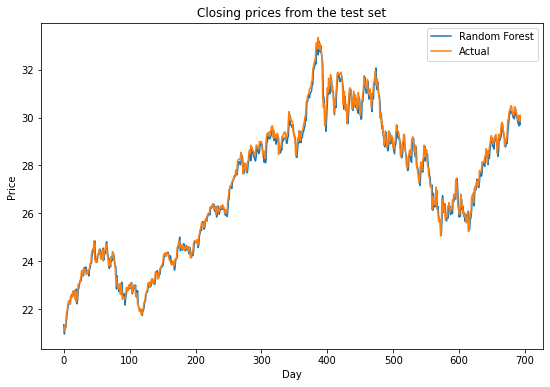

In [6]:
# initialise and train a random forest regression model
model = ???

# train the model
???

# use the model to make predictions on the test set
y_pred = ???

# now let's generate closing price predictions based on the predicted changes
predicted_next_prices = ??? # hint: current price * (1 + predicted % change * 0.01)
real_next_prices = ??? # hint: current price * (1 + actual % change * 0.01)

# calculate MAE and store predictions for comparing all models' predictions on one graph
model_name = "Random Forest"
model_data[model_name] = {
    "error": ???, 
    "predictions": predicted_next_prices
}
print("Error of " + model_name + " regression model based on % change:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(???, label=model_name)
plt.plot(???, label="Actual") # same as multiplying y_test by closing prices
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

### 2.3 kNN

Error of kNN regression model based on % change: 0.22690641066282438


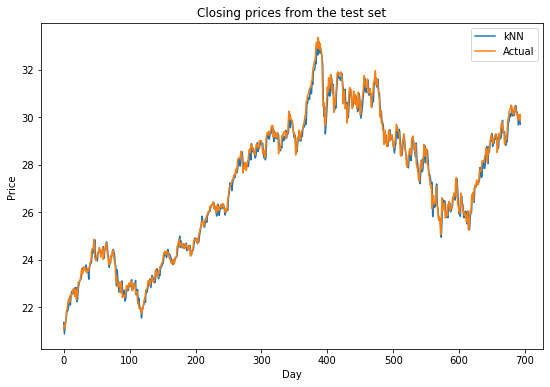

In [7]:
# initialise and train a kNN model
model = ???

# train the model
???

# use the model to make predictions on the test set
y_pred = ???

# now let's generate closing price predictions based on the predicted changes
predicted_next_prices = ???
real_next_prices = ???

# calculate MAE and store predictions for comparing all models' predictions on one graph
model_name = "kNN"
model_data[model_name] = {
    "error": ???, 
    "predictions": predicted_next_prices
}
print("Error of " + model_name + " regression model based on % change:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(predicted_next_prices, label=model_name)
plt.plot(real_next_prices, label="Actual") # same as multiplying y_test by closing prices
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

### 2.4 SVM

Error of SVM regression model based on % change: 0.20723229939289053


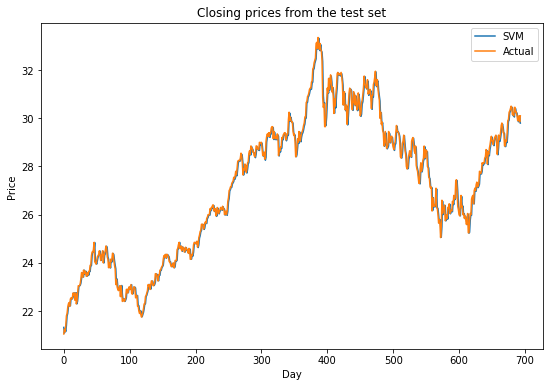

In [8]:
# initialise and train an SVR model
model = ???

# train the model
???

# use the model to make predictions on the test set
y_pred = ???

# now let's generate closing price predictions based on the predicted changes
predicted_next_prices = ???
real_next_prices = ???

# calculate MAE and store predictions for comparing all models' predictions on one graph
model_name = "SVM"
model_data[model_name] = {
    "error": ???, 
    "predictions": predicted_next_prices
}
print("Error of " + model_name + " regression model based on % change:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(predicted_next_prices, label=model_name)
plt.plot(real_next_prices, label="Actual") # same as multiplying y_test by closing prices
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

### 2.5 Neural Network

Error of MLP regression model based on % change: 0.20682700293212905


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


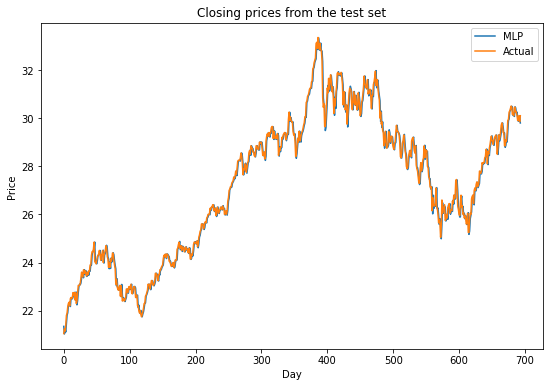

In [9]:
# initialise and train a neural network
model = ???

# train the model
???

# use the model to make predictions on the test set
y_pred = ???

# now let's generate closing price predictions based on the predicted changes
predicted_next_prices = ???
real_next_prices = ???

# calculate MAE and store predictions for comparing all models' predictions on one graph
model_name = "MLP"
model_data[model_name] = {
    "error": ???, 
    "predictions": predicted_next_prices
}
print("Error of " + model_name + " regression model based on % change:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(predicted_next_prices, label=model_name)
plt.plot(real_next_prices, label="Actual") # same as multiplying y_test by closing prices
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

### 2.6 Evaluating All Models

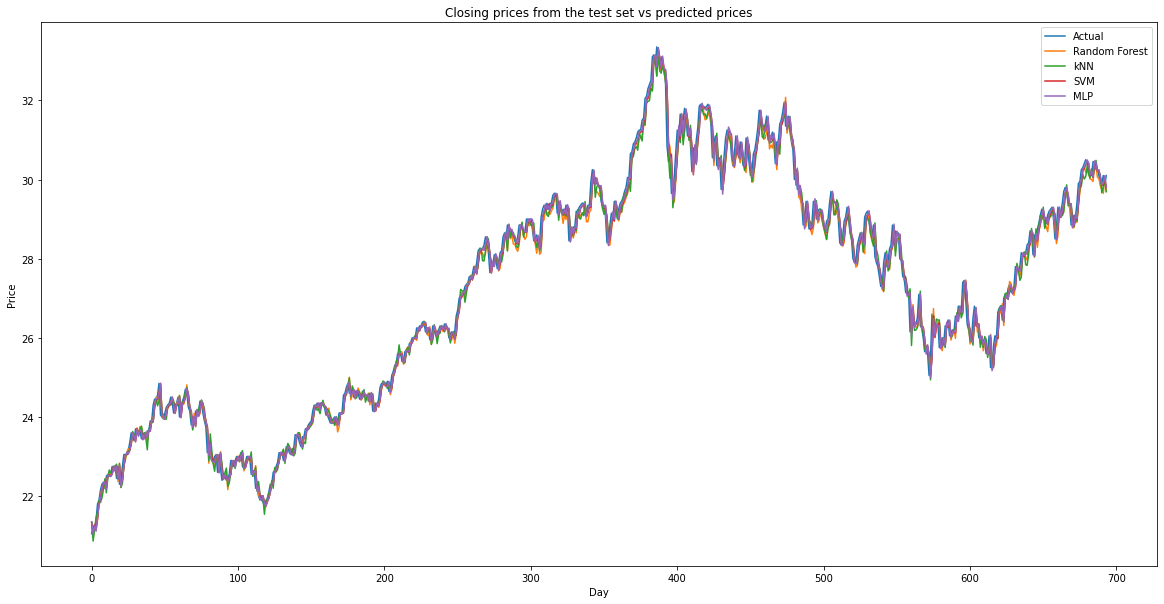

In [10]:
# now let's plot all models' predictions on one graph 
plt.figure(figsize=(20,10))
plt.title("Closing prices from the test set vs predicted prices")
plt.ylabel('Price')
plt.xlabel('Day')
plt.plot(real_next_prices, label="Actual")

for m in model_data:
    plt.plot(model_data[m]["predictions"], label=m)

plt.legend()
plt.show()   

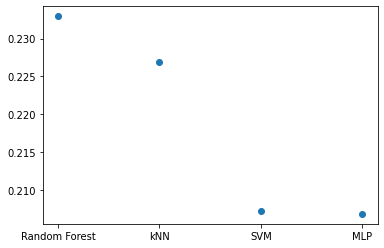

In [11]:
# let's plot the errors of different models using a scatter plot
model_names = [m for m in model_data]
model_errors = [model_data[m]["error"] for m in model_names]
plt.scatter(model_names, model_errors)
plt.show() 

Compared with the previous approach, the error range of the models became much smaller because % change doesn't rely on actual values. Next, try adding more features, e.g. Open, Volume, etc. Also, try to implement LSTM for price-change-%-based stock price prediction. Good luck! :)